hello!

question to analyze:
predict alcohol consumption based on religion

1. Inspect the datasets
2. Cleanup the data (reduce features, consolidate features, handle nans)
3. Analyze data distribution, trends, correlations
4. Build a regression model

In [21]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
print(glob.glob("*.csv"))

['OECD_Alcohol_Consumption_per_Capita.csv', 'relig_iso.csv', 'WRP_global_data.csv', 'WRP_national_data.csv']


In [23]:
OECD_Alcohol = pd.read_csv('OECD_Alcohol_Consumption_per_Capita.csv',encoding='utf-8')
#alcohol consumption throughout the years, throughout the countries
WRP_national = pd.read_csv('WRP_national_data.csv',encoding='utf-8')
#1995 values, religion over the years


## Inspecting datasets

### OECD_Alcohol

In [24]:
OECD_Alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 172.1+ KB


In [28]:
OECD_Alcohol.head(20)

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [50]:
for col in OECD_Alcohol.columns:
    if OECD_Alcohol[col].dtype == 'object':
        uniques = OECD_Alcohol[col].unique()
        print(f'''{col} unique values:
        {uniques}''')

LOCATION unique values:
        ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'EST' 'IND' 'IDN'
 'ISR' 'RUS' 'SVN' 'ZAF' 'COL' 'LVA' 'LTU' 'CRI' 'ARG' 'BGR' 'HRV' 'PER'
 'ROU']
INDICATOR unique values:
        ['ALCOHOL']
SUBJECT unique values:
        ['TOT']
MEASURE unique values:
        ['LT_CAP15']
FREQUENCY unique values:
        ['A']
Flag Codes unique values:
        [nan 'B' 'D' 'E' 'P']


In [40]:
OECD_Alcohol.FREQUENCY.unique()

array(['A'], dtype=object)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
5,AUS,ALCOHOL,TOT,LT_CAP15,A,1965,10.0,NaN
6,AUS,ALCOHOL,TOT,LT_CAP15,A,1966,10.3,NaN
7,AUS,ALCOHOL,TOT,LT_CAP15,A,1967,10.8,NaN
8,AUS,ALCOHOL,TOT,LT_CAP15,A,1968,11.1,NaN
9,AUS,ALCOHOL,TOT,LT_CAP15,A,1969,11.6,NaN


### WRP dataset

In [30]:
WRP_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 84 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1995 non-null   int64  
 1   state         1995 non-null   int64  
 2   name          1995 non-null   object 
 3   chrstprot     1995 non-null   int64  
 4   chrstcat      1995 non-null   int64  
 5   chrstorth     1995 non-null   int64  
 6   chrstang      1995 non-null   int64  
 7   chrstothr     1995 non-null   int64  
 8   chrstgen      1995 non-null   int64  
 9   judorth       1995 non-null   int64  
 10  jdcons        1995 non-null   int64  
 11  judref        1993 non-null   float64
 12  judothr       1995 non-null   int64  
 13  judgen        1995 non-null   int64  
 14  islmsun       1995 non-null   int64  
 15  islmshi       1995 non-null   int64  
 16  islmibd       1995 non-null   int64  
 17  islmnat       1995 non-null   int64  
 18  islmalw       1995 non-null 

In [29]:
WRP_national.year.unique()

array([1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,
       2000, 2005, 2010], dtype=int64)

In [34]:
WRP_national.nonreligpct

0       0.1635
1       0.1482
2       0.1404
3       0.1193
4       0.1020
         ...  
1990    0.0073
1991    0.0066
1992    0.0083
1993    0.0083
1994    0.0146
Name: nonreligpct, Length: 1995, dtype: float64

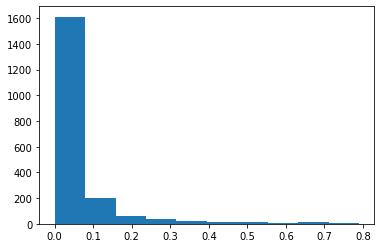

<function matplotlib.pyplot.clf()>

In [31]:
plt.hist(WRP_national.nonreligpct)
plt.show()
plt.clf

### Combining the datasets

In [ ]:
OECD_countries = OECD_Alcohol.LOCATION.unique()
WRP_countries = WRP_national.name.unique()
common_countries = [i for i in OECD_countries if i in WRP_countries]
print(common_countries)